<a href="https://colab.research.google.com/github/subhobrata/Deep-Learning/blob/master/Udacity_ComputerVision_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/udacity/CVND_Exercises.git

Cloning into 'CVND_Exercises'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 774 (delta 0), reused 0 (delta 0), pack-reused 773
Receiving objects: 100% (774/774), 134.19 MiB | 10.55 MiB/s, done.
Resolving deltas: 100% (132/132), done.
Checking out files: 100% (552/552), done.


In [2]:
cd CVND_Exercises

/content/CVND_Exercises


In [3]:
cd 1_3_Types_of_Features_Image_Segmentation


/content/CVND_Exercises/1_3_Types_of_Features_Image_Segmentation


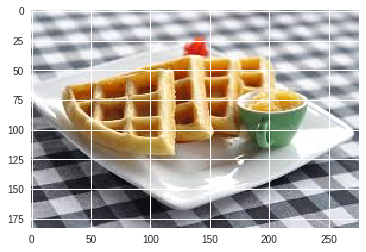

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/waffle.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

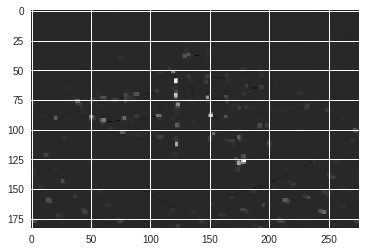

In [5]:
# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Detect corners 
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)

plt.imshow(dst, cmap='gray')

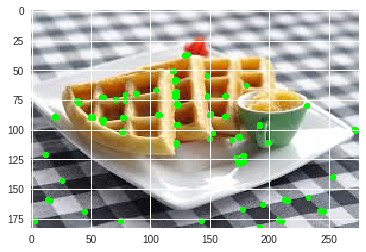

In [6]:
## TODO: Define a threshold for extracting strong corners
# This value vary depending on the image and how many corners you want to detect
# Try changing this free parameter, 0.1, to be larger or smaller ans see what happens
thresh = 0.1*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)

plt.imshow(corner_image)

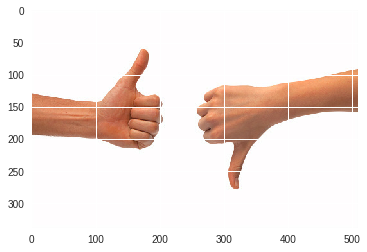

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/thumbs_up_down.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

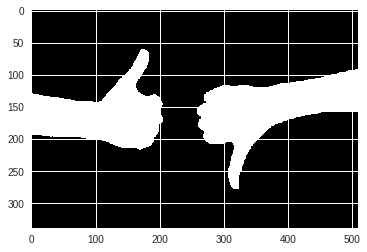

In [8]:
# Convert to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Create a binary thresholded image
retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap='gray')

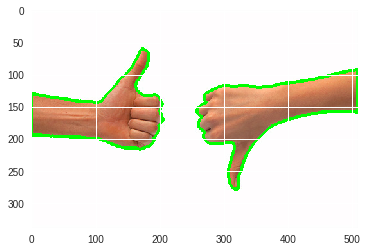

In [9]:
# Find contours from thresholded, binary image
retval, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours on a copy of the original image
contours_image = np.copy(image)
contours_image = cv2.drawContours(contours_image, contours, -1, (0,255,0), 3)

plt.imshow(contours_image)

In [10]:
## TODO: Complete this function so that 
## it returns the orientations of a list of contours
## The list should be in the same order as the contours
## i.e. the first angle should be the orientation of the first contour
def orientations(contours):
    """
    Orientation 
    :param contours: a list of contours
    :return: angles, the orientations of the contours
    """
    
    # Create an empty list to store the angles in
    # Tip: Use angles.append(value) to add values to this list
    angles = []
    
    return angles


# ---------------------------------------------------------- #
# Print out the orientation values
angles = orientations(contours)
print('Angles of each contour (in degrees): ' + str(angles))

Angles of each contour (in degrees): []


In [0]:
## TODO: Complete this function so that
## it returns a new, cropped version of the original image
def left_hand_crop(image, selected_contour):
    """
    Left hand crop 
    :param image: the original image
    :param selectec_contour: the contour that will be used for cropping
    :return: cropped_image, the cropped image around the left hand
    """
    
    ## TODO: Detect the bounding rectangle of the left hand contour
    
    ## TODO: Crop the image using the dimensions of the bounding rectangle
    # Make a copy of the image to crop
    cropped_image = np.copy(image)
    
    return cropped_image


## TODO: Select the left hand contour from the list
## Replace this value
selected_contour = None


# ---------------------------------------------------------- #
# If you've selected a contour
if(selected_contour is not None):
    # Call the crop function with that contour passed in as a parameter
    cropped_image = left_hand_crop(image, selected_contour)
    plt.imshow(cropped_image)